In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data-cleaned.csv")
df.drop('Unnamed: 0',inplace=True,axis=1)
df

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,38.00407,36.253840,26.323170,DD164,White,B,37.525,37.708,26.546,75D,1211,Black,Taffeta
1,37.67931,36.386490,26.184560,DD164,White,R,37.525,37.708,26.546,75D,1211,Black,Taffeta
2,37.88121,36.205170,26.034750,DD164,White,Y,37.525,37.708,26.546,75D,1211,Black,Taffeta
3,38.14394,37.289590,26.690500,DD164,White,B,37.525,37.708,26.546,75D,1211,White,Taffeta
4,38.17764,37.941370,26.850100,DD164,White,R,37.525,37.708,26.546,75D,1211,White,Taffeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59476,84.92196,-5.782575,1.478362,DD164,White,R,84.432,-8.272,2.727,75D,1211,White,Taffeta
59477,86.67738,-6.509423,4.290485,DD164,White,Y,84.432,-8.272,2.727,75D,1211,White,Taffeta
59478,81.18523,-5.026460,0.591886,DD164,White,B,84.432,-8.272,2.727,75D,1211,Black,Taffeta
59479,81.17082,-5.086213,0.662887,DD164,White,R,84.432,-8.272,2.727,75D,1211,Black,Taffeta


We are going to train only for the target L_weft (as there are 3 targets a,b and L)

In [3]:
df.drop('a_weft',inplace=True,axis=1)
df.drop('b_weft',inplace=True,axis=1)

y = df.L_weft

x = df.drop('L_weft',axis=1)


x

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,38.00407,36.253840,26.323170,DD164,White,B,75D,1211,Black,Taffeta
1,37.67931,36.386490,26.184560,DD164,White,R,75D,1211,Black,Taffeta
2,37.88121,36.205170,26.034750,DD164,White,Y,75D,1211,Black,Taffeta
3,38.14394,37.289590,26.690500,DD164,White,B,75D,1211,White,Taffeta
4,38.17764,37.941370,26.850100,DD164,White,R,75D,1211,White,Taffeta
...,...,...,...,...,...,...,...,...,...,...
59476,84.92196,-5.782575,1.478362,DD164,White,R,75D,1211,White,Taffeta
59477,86.67738,-6.509423,4.290485,DD164,White,Y,75D,1211,White,Taffeta
59478,81.18523,-5.026460,0.591886,DD164,White,B,75D,1211,Black,Taffeta
59479,81.17082,-5.086213,0.662887,DD164,White,R,75D,1211,Black,Taffeta


Removing BackingLayer feature and using a minmax scaling for the model

In [4]:
#Using label encoding for all the non numerical columns
columns = ["Construction","BackingLayer2nd","PatternLayer3rd","WeftDenier","WarpColor","WeavingMachine"]

for col in columns:
    x[col] = LabelEncoder().fit_transform(x[col])


x = minmax_scaling(x,columns=[i for i in x.columns if i != "BackingLayer2nd"])

#Transforming our data into np.float32 because it's easier and better for our model
x = np.asarray(x).astype(np.float32)

x

array([[0.21296242, 0.63651615, 0.4713932 , ..., 0.7692308 , 0.        ,
        1.        ],
       [0.20929542, 0.637278  , 0.47058752, ..., 0.7692308 , 0.        ,
        1.        ],
       [0.21157517, 0.6362366 , 0.46971676, ..., 0.7692308 , 0.        ,
        1.        ],
       ...,
       [0.7005386 , 0.39942336, 0.32182965, ..., 0.7692308 , 0.        ,
        1.        ],
       [0.7003759 , 0.39908016, 0.32224235, ..., 0.7692308 , 0.        ,
        1.        ],
       [0.69760895, 0.39931262, 0.32216522, ..., 0.7692308 , 0.        ,
        1.        ]], dtype=float32)

In [5]:
#Fixing the random state to 42 (arbitrary value)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=42)



y_train.shape, X_train.shape

((53532,), (53532, 9))

In [6]:
print("--Make model--")
#Adding Dense layers with relu activation to increase the model's accuracy
model = tf.keras.models.Sequential([
#Changing the input shape to 9 because one feature has been removed
  Dense(10, input_shape=(9,)),
  Dense(256, activation='relu'),
  Dense(256, activation='sigmoid'),
  Dense(128, activation='sigmoid'),
  Dense(64, activation='sigmoid'),
  Dense(1, activation='sigmoid')
])

#Changing the model optimizer to adam and using mean squared error and mean absolute percentage error because it's a regression problem
model.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])

print("--Fit model--")
model.fit(X_train, y_train, epochs=1, verbose=2)

--Make model--
--Fit model--
1673/1673 - 2s - loss: 3817.6824 - mean_absolute_percentage_error: 98.1954 - 2s/epoch - 1ms/step


In [7]:
print("--Evaluate model--")
model_loss1,model_abs_error1 = model.evaluate(X_train,  y_train, verbose=2)
model_loss2,model_abs_error2 = model.evaluate(X_test,  y_test, verbose=2)
print("Train loss:",model_loss1,"\nTest loss :",model_loss2)
print("Train MAPE:",model_abs_error1,"%","\nTest MAPE :",model_abs_error2,"%")

--Evaluate model--
1673/1673 - 1s - loss: 3817.3848 - mean_absolute_percentage_error: 98.1907 - 1s/epoch - 682us/step
186/186 - 0s - loss: 3800.5867 - mean_absolute_percentage_error: 98.1845 - 150ms/epoch - 804us/step
Train loss: 3817.384765625 
Test loss : 3800.586669921875
Train MAPE: 98.19071960449219 % 
Test MAPE : 98.18451690673828 %


Choosing the L_label feature and visualizing its relation with the predictions

1859/1859 [==============================] - 1s 620us/step


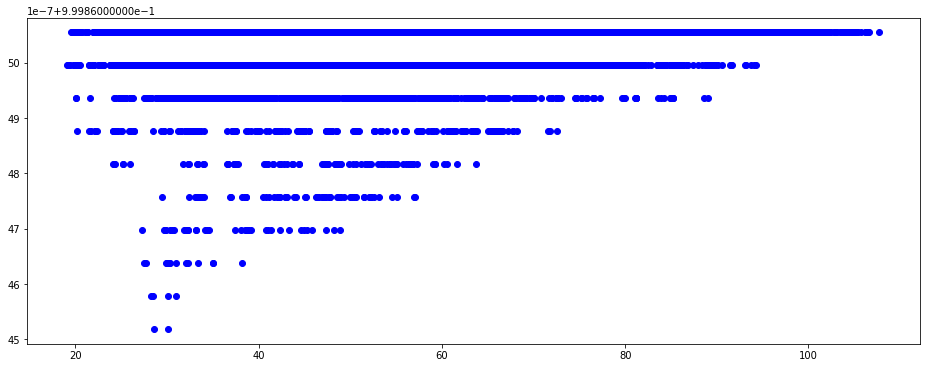

In [8]:
#Creating predictions array
predictions = model.predict(x)


#Defining the figure size
plt.figure(figsize=(16, 6))

#Generating the scatter plot between two columns
plt.scatter(df.L_label,predictions,c="blue")

